Logistic Regression 

code book: 

breastcancerper100TH: Number of new cases of breast cancer in 100,000 female residents during the certain year

lifeexpectancy: The average number of years a newborn child would live if current mortality patterns were to stay the same.

alcconsumption: Recorded and estimated average alcohol consumption, adult (15+) per capita consumption in litres pure alcohol

Assumption: the association between breast cancer for female and life expectancy

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [3]:
df = pd.read_csv('gapminder.csv')

In [4]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [5]:
# convert variables to numeric format using convert_objects function
df['breastcancerper100th'] = pd.to_numeric(df['breastcancerper100th'], errors = 'coerce')
df['lifeexpectancy'] = pd.to_numeric(df['lifeexpectancy'], errors = 'coerce')
df['alcconsumption'] = pd.to_numeric(df['alcconsumption'], errors='coerce')


In [6]:
# drop NA
sub1 = df[['breastcancerper100th', 'lifeexpectancy','alcconsumption']].dropna()

AxesSubplot(0.125,0.125;0.775x0.755)


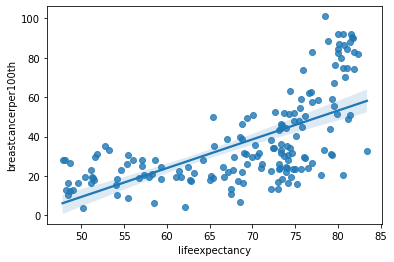

In [7]:
#scatter plot: want to check the association
scat1 = sns.regplot( x='lifeexpectancy', y='breastcancerper100th', scatter=True, data=sub1)
print(scat1)

In [8]:
# create binary breastcancerper100th dependence variable
# recategorize breastcancerper100th to high and low as binary variables 
# above average is recoded as high =1, below average is recoded as low =0 
def breastcancerbi (x):
    if x['breastcancerper100th'] > sub1['breastcancerper100th'].mean():
        return 1
    else:
        return 0
sub1['breastcancerbi'] = sub1.apply (lambda x: breastcancerbi(x), axis =1)
print(pd.crosstab(sub1['breastcancerper100th'], sub1['breastcancerbi']))

breastcancerbi        0  1
breastcancerper100th      
3.90                  1  0
4.40                  1  0
6.40                  1  0
6.60                  1  0
8.80                  1  0
...                  .. ..
90.00                 0  1
90.80                 0  1
91.90                 0  2
92.00                 0  1
101.10                0  1

[135 rows x 2 columns]


In [9]:
#logistic regression breast cancer 
loreg1 = smf.logit(formula = 'breastcancerbi ~lifeexpectancy', data = sub1).fit()
print(loreg1.summary())

Optimization terminated successfully.
         Current function value: 0.413634
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         breastcancerbi   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Aug 2022   Pseudo R-squ.:                  0.3619
Time:                        16:21:25   Log-Likelihood:                -69.490
converged:                       True   LL-Null:                       -108.89
Covariance Type:            nonrobust   LLR p-value:                 6.846e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -20.0073      3.549     -5.638      0.000     -26.963     -13.052
lifeexpectancy   

The logistic regression used here is Y = -20.0073 + 0.2670Xi. The result of this regression model indicates that life expectancy (Beta = 0.2670, p = 0.0001, R-square = 0.3619) was significantly and positively associated with breast cancer. 

In [10]:
# odds ratio

print('odds ratio')
print (np.exp(loreg1.params))

odds ratio
Intercept        0.00
lifeexpectancy   1.31
dtype: float64


Higher life expectancy (newborn child) in sample is 1.31 times more likely to have breast cancer ( new cases in female) than lower life expectancy. 

In [11]:
# Oddds ratio with 95% confidence intervals
params = loreg1.params
conf = loreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf))

                Lower CI  Upper CI   OR
Intercept           0.00      0.00 0.00
lifeexpectancy      1.19      1.43 1.31


Higher life expectancy are anywhere from 1.19 to 1.43 times more likely to have breast cancer for female in popoulation parameter. 

In [12]:
# potential confounding variables -- alcconsumption: alcohol consumption per adult (age 15+), litres
#center quantitative for regression analysis
sub1['lifeexpectancy_c'] = sub1['lifeexpectancy'] - sub1['lifeexpectancy'].mean()
sub1['alcconsumption_c'] = sub1['alcconsumption'] - sub1['alcconsumption'].mean()


In [13]:
sub1.describe()

,breastcancerper100th,lifeexpectancy,alcconsumption,breastcancerbi,lifeexpectancy_c,alcconsumption_c
count,168.00,168.00,168.00,168.00,168.00,168.00
mean,37.24,69.07,6.62,0.35,0.00,0.00
std,22.89,10.00,5.02,0.48,10.00,5.02
min,3.90,47.79,0.03,0.00,-21.27,-6.59
25%,20.55,62.37,2.39,0.00,-6.70,-4.23
50%,29.80,72.81,5.87,0.00,3.74,-0.75
75%,49.73,76.13,9.73,1.00,7.06,3.11
max,101.10,83.39,23.01,1.00,14.33,16.39


In [15]:
# logistic regression 2 consider potential confounding variable

loreg2 = smf.logit(formula = 'breastcancerbi ~ lifeexpectancy_c + alcconsumption_c', data = sub1).fit()
print(loreg2.summary())

Optimization terminated successfully.
         Current function value: 0.315701
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         breastcancerbi   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Aug 2022   Pseudo R-squ.:                  0.5129
Time:                        16:25:11   Log-Likelihood:                -53.038
converged:                       True   LL-Null:                       -108.89
Covariance Type:            nonrobust   LLR p-value:                 5.518e-25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.6354      0.377     -4.344      0.000      -2.373      -0.897
lifeexpecta

The logistic regression used here is Y = -1.6354 + 0.2416X1 + 0.2654X2. The result of this regression model indicates that life expectancy (Beta = 0.2416, p = 0.0001, R-square = 0.5129) was significantly and positively associated with breast cancer. Also, alcohol consumption (Beta = 0.2654, p = 0.0001) was significantly and positively associated with the breast cancer.  

In [16]:
# odds ratio with 95% confidence intervals

params = loreg2.params
conf = loreg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf))


                  Lower CI  Upper CI   OR
Intercept             0.09      0.41 0.19
lifeexpectancy_c      1.15      1.41 1.27
alcconsumption_c      1.17      1.45 1.30


Higher life expectancy (newborn child) in sample is 1.27 times more likely to have breast cancer ( new cases in female) than lower life expectancy. And more alcohol consumption in sample is 1.3 times more likely to have breast cancer than less alcohol consumption. 

Higher life expectancy are anywhere from 1.15 to 1.41 times more likely to have breast cancer for female in popoulation parameter. And more alcohol consumption are anywhere from 1.17 to 1.45 times more likely to have breast cancer in population. 
